<a href="https://colab.research.google.com/github/Ash100/DaS/blob/main/MM_GB(PB)SA_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook is to plot the MM-GBSA and PBSA Data- Generated by Dr. Ashfaq Ahmad

In [ ]:
#Install Plotnine
!pip install pandas plotnine

In [2]:
import warnings
warnings.filterwarnings('ignore')

Remove the sum of values normally present in the first row or last and upload all the file to the notebook.

df_all columns: Index(['RESIDUE_ID', 'VDW', 'ELE', 'GB', 'SA', 'TOTAL', 'Protein'], dtype='object')
df_melted head:     RESIDUE_ID Protein EnergyType  EnergyValue
0  R-B-SER-341  Native        VDW          0.0
1  R-B-MET-342  Native        VDW          0.0
2  R-B-MET-343  Native        VDW          0.0
3  R-B-GLY-344  Native        VDW          0.0
4  R-B-LEU-345  Native        VDW          0.0


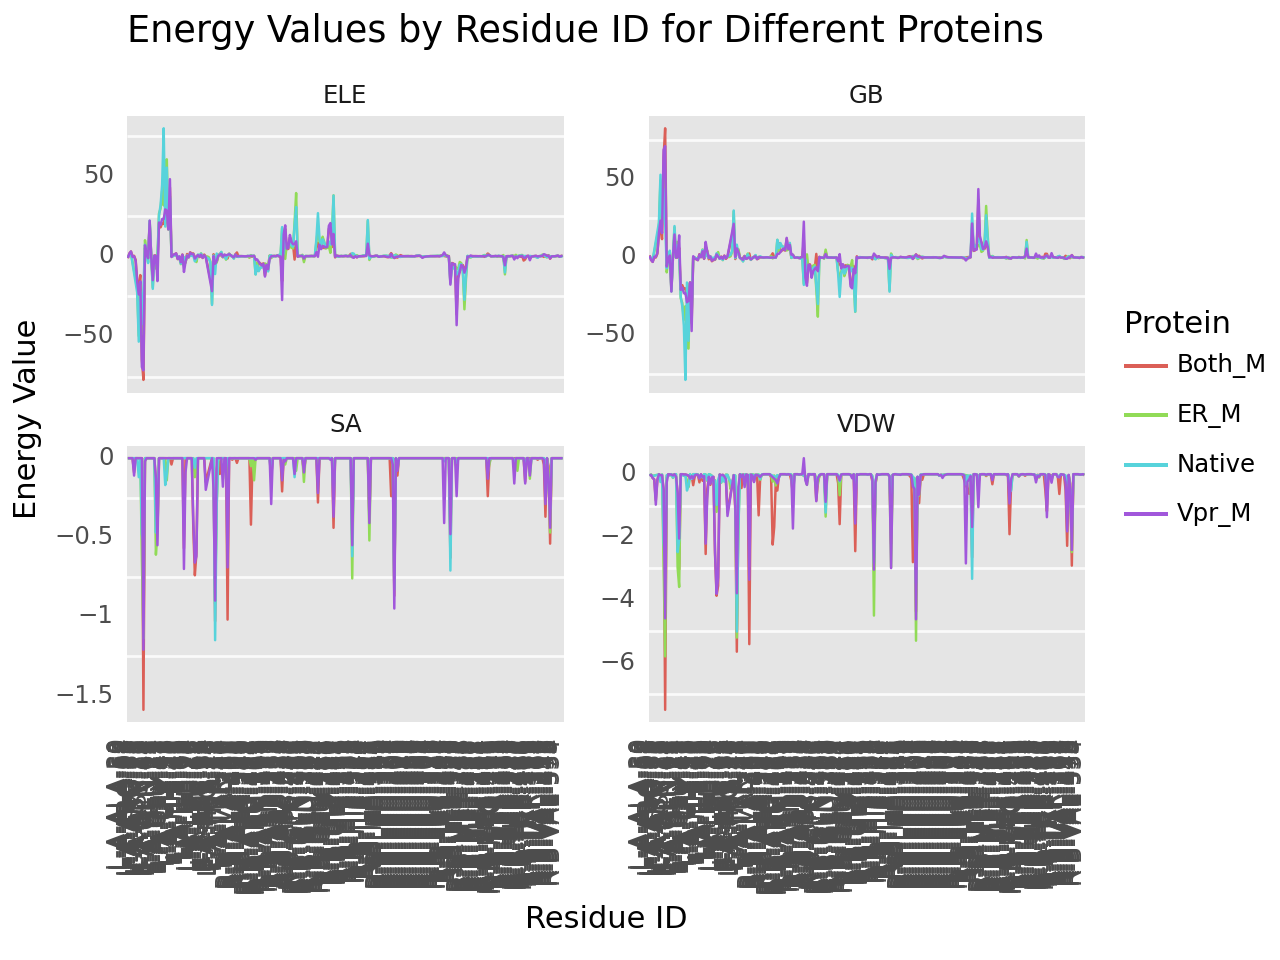

In [38]:
import numpy as np
import pandas as pd
from plotnine import *

# Function to strip leading/trailing spaces from column names
def strip_column_names(df):
    df.columns = df.columns.str.strip()
    return df

# Load the CSV files
df1 = pd.read_csv('/content/sample_data/EVprNat.csv')
df2 = pd.read_csv('/content/sample_data/EVprVprMut.csv')
df3 = pd.read_csv('/content/sample_data/EVprERmut.csv')
df4 = pd.read_csv('/content/sample_data/EVprBothMut.csv')

# Strip leading/trailing spaces from column names
df1 = strip_column_names(df1)
df2 = strip_column_names(df2)
df3 = strip_column_names(df3)
df4 = strip_column_names(df4)

# Add a 'Protein' column to each DataFrame to identify the dataset
df1['Protein'] = 'Native'
df2['Protein'] = 'Vpr_M'
df3['Protein'] = 'ER_M'
df4['Protein'] = 'Both_M'

# Concatenate the DataFrames
df_all = pd.concat([df1, df2, df3, df4])

# Print combined DataFrame column names for debugging
print("df_all columns:", df_all.columns)

# Melt the DataFrame to long format
df_melted = pd.melt(df_all, id_vars=['RESIDUE_ID', 'Protein'],
                    value_vars=['VDW', 'ELE', 'GB', 'SA'],
                    var_name='EnergyType', value_name='EnergyValue')

# Print the melted DataFrame for debugging
print("df_melted head:", df_melted.head())

# Filter the DataFrame for values greater than +20
df_labels = df_melted[df_melted['EnergyValue'] > 20]

# Create the plot
p = (
    ggplot(df_melted, aes(x='RESIDUE_ID', y='EnergyValue', color='Protein', group='Protein')) +
    geom_line() +
    facet_wrap('~EnergyType', scales='free_y') +
    labs(title='Energy Values by Residue ID for Different Proteins', x='Residue ID', y='Energy Value') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
)

print(p)

Below I have also generated the vertical line that basically dimarcates the two proteins present in the complex and save

In [43]:
import numpy as np
import pandas as pd
from plotnine import *

# Function to strip leading/trailing spaces from column names
def strip_column_names(df):
    df.columns = df.columns.str.strip()
    return df

# Load the CSV files
df1 = pd.read_csv('/content/sample_data/EVprNat.csv')
df2 = pd.read_csv('/content/sample_data/EVprVprMut.csv')
df3 = pd.read_csv('/content/sample_data/EVprERmut.csv')
df4 = pd.read_csv('/content/sample_data/EVprBothMut.csv')

# Strip leading/trailing spaces from column names
df1 = strip_column_names(df1)
df2 = strip_column_names(df2)
df3 = strip_column_names(df3)
df4 = strip_column_names(df4)

# Add a 'Protein' column to each DataFrame to identify the dataset
df1['Protein'] = 'Native'
df2['Protein'] = 'Vpr_M'
df3['Protein'] = 'ER_M'
df4['Protein'] = 'Both_M'

# Concatenate the DataFrames
df_all = pd.concat([df1, df2, df3, df4])

# Print combined DataFrame column names for debugging
print("df_all columns:", df_all.columns)

# Melt the DataFrame to long format
df_melted = pd.melt(df_all, id_vars=['RESIDUE_ID', 'Protein'],
                    value_vars=['VDW', 'ELE', 'GB', 'SA'],
                    var_name='EnergyType', value_name='EnergyValue')

# Print the melted DataFrame for debugging
print("df_melted head:", df_melted.head())

# Filter the DataFrame for values greater than +20
#df_labels = df_melted[df_melted['EnergyValue'] > 20]

p = (
    ggplot(df_melted, aes(x='RESIDUE_ID', y='EnergyValue', color='Protein', group='Protein')) +
    geom_line() +  # Line plot
    geom_vline(xintercept=207, linetype='dashed', color='green', alpha=0.5) +  # Vertical line at residue 232
    facet_wrap('~EnergyType', scales='free_y') +  # Facet by EnergyType
    labs(title='ERVpr_Complexes and Residues Role in MM-GBSA', x='Residue ID', y='Energy Value') +  # Labels
    theme_minimal() +  # Minimal theme
    theme(axis_text_x=element_text(rotation=90, hjust=1, weight='bold'))  # Rotate x-axis labels and make them bold
)

#print(p)

# Save plot as 600 dpi PNG file
p.save(filename='GBSA-ERVpr-all.png', dpi=600)

print("Plot saved as plot.png with 600 dpi.")

df_all columns: Index(['RESIDUE_ID', 'VDW', 'ELE', 'GB', 'SA', 'TOTAL', 'Protein'], dtype='object')
df_melted head:     RESIDUE_ID Protein EnergyType  EnergyValue
0  R-B-SER-341  Native        VDW          0.0
1  R-B-MET-342  Native        VDW          0.0
2  R-B-MET-343  Native        VDW          0.0
3  R-B-GLY-344  Native        VDW          0.0
4  R-B-LEU-345  Native        VDW          0.0
Plot saved as plot.png with 600 dpi.


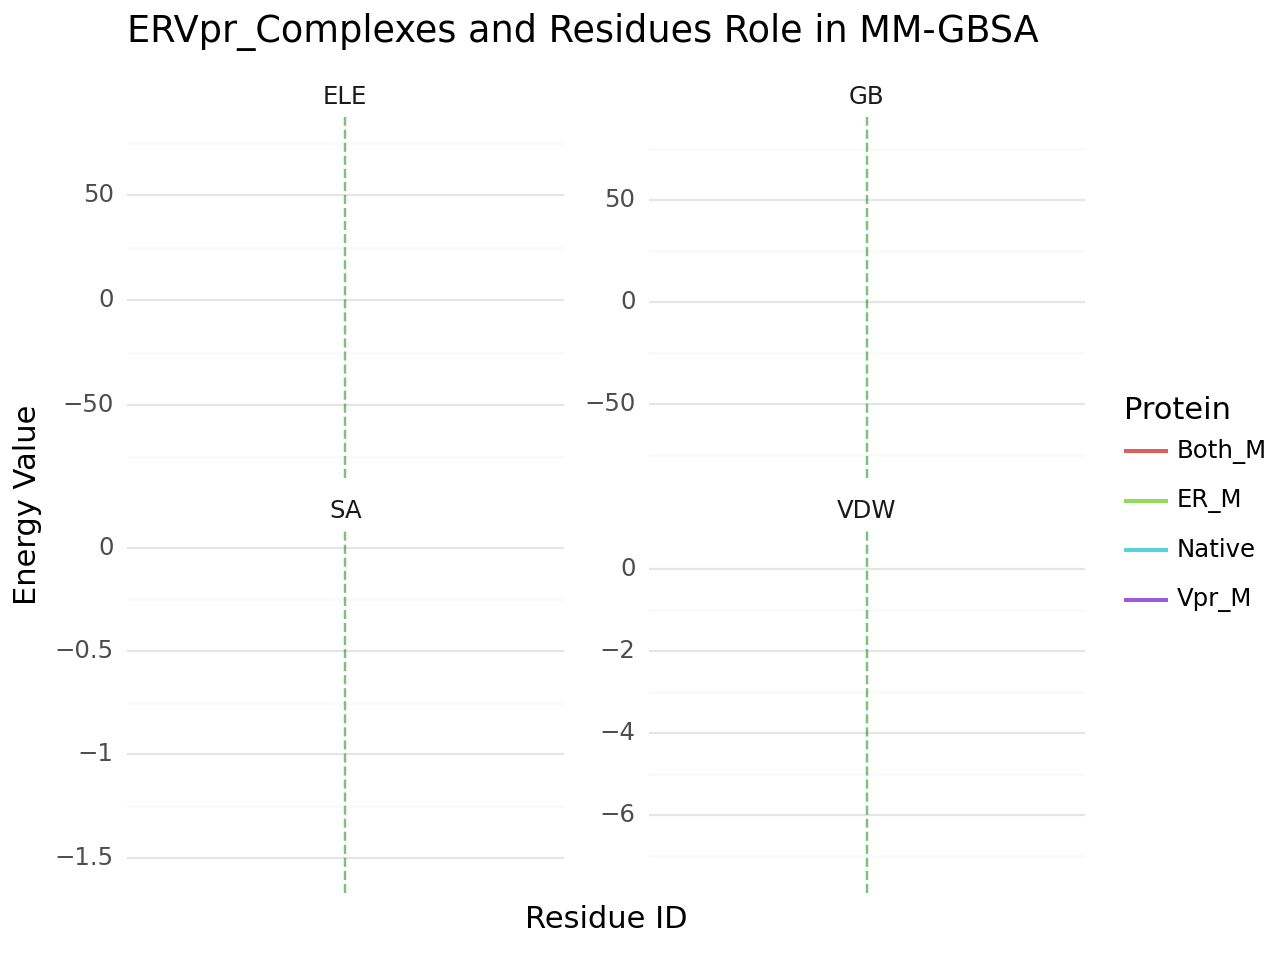

In [40]:
import numpy as np
import pandas as pd
from plotnine import *

# Function to strip leading/trailing spaces from column names
def strip_column_names(df):
    df.columns = df.columns.str.strip()
    return df

# Load the CSV files (adjust paths as needed)
df1 = pd.read_csv('/content/sample_data/EVprNat.csv')
df2 = pd.read_csv('/content/sample_data/EVprVprMut.csv')
df3 = pd.read_csv('/content/sample_data/EVprERmut.csv')
df4 = pd.read_csv('/content/sample_data/EVprBothMut.csv')

# Strip leading/trailing spaces from column names
df1 = strip_column_names(df1)
df2 = strip_column_names(df2)
df3 = strip_column_names(df3)
df4 = strip_column_names(df4)

# Add a 'Protein' column to each DataFrame to identify the dataset
df1['Protein'] = 'Native'
df2['Protein'] = 'Vpr_M'
df3['Protein'] = 'ER_M'
df4['Protein'] = 'Both_M'

# Concatenate the DataFrames
df_all = pd.concat([df1, df2, df3, df4])

# Melt the DataFrame to long format
df_melted = pd.melt(df_all, id_vars=['RESIDUE_ID', 'Protein'],
                    value_vars=['VDW', 'ELE', 'GB', 'SA'],
                    var_name='EnergyType', value_name='EnergyValue')

# Convert RESIDUE_ID to numeric (if needed)
df_melted['RESIDUE_ID'] = pd.to_numeric(df_melted['RESIDUE_ID'], errors='coerce')

# Define the breaks and labels for the x-axis
x_breaks = np.arange(1, 300, 20)  # Adjust the range as per your requirement
x_labels = x_breaks.astype(str)

# Create the plot
p = (
    ggplot(df_melted, aes(x='RESIDUE_ID', y='EnergyValue', color='Protein', group='Protein')) +
    geom_line() +  # Line plot
    geom_vline(xintercept=207, linetype='dashed', color='green', alpha=0.5) +  # Vertical line at residue 207
    facet_wrap('~EnergyType', scales='free_y') +  # Facet by EnergyType
    labs(title='ERVpr_Complexes and Residues Role in MM-GBSA', x='Residue ID', y='Energy Value') +  # Labels
    theme_minimal() +  # Minimal theme
    theme(axis_text_x=element_text(rotation=90, hjust=1, size=8)) +  # Rotate x-axis labels and adjust size
    scale_x_continuous(breaks=x_breaks, labels=x_labels.tolist())  # Set custom breaks and labels for x-axis
)

print(p)